In [2]:
from scrapers.hh_ru_scraper import scrape
from preprocess import preprocess

In [3]:
raw_tags_path = 'data/scraped_test.json'
processed_tags_path = 'data/processed_test.json'

In [4]:
# scrape tags from hh.ru and save results
raw_tags_list = scrape("YOLO", save_path=raw_tags_path)

scraping page 1
44410393
C/C++ Linux Пользователь ПК Точность и внимательность к деталям

47751059
Python Git Linux C/C++ Bash

47948600
Python PyTorch Английский язык MongoDB Docker Kubernetes

47889464
Python OpenCV C++ Tensorflow YoLo3+ Машинное обучение Machine Learning Computer Vision

48514200
Деловое общение Деловая переписка Английский язык Обучение и развитие Деловая коммуникация Zoom Преподавание

48127081
Machine Learning Python Linux Git OpenCV

47593927
Data Scientist Machine learning Computer Vision OpenVINO cv::dnn

48583639
Git Phyton Agile Atlassian Jira

48148604
Computer Vision Машинное обучение Python PyTorch TensorFlow Математическая статистика Анализ данных Deep Learning Neural Networks

40558689
Python Agile Project Management machine learning data science Pandas PyTorch RecSys

48135523
Python OpenCV Нейронные сети PyTorch Tensorflow Работа в команде

47948599
Python PyTorch Английский язык MongoDB Docker Kubernetes

48426300
Python PyTorch Tensorflow SQL Keras


In [5]:
raw_tags_list

[['C/C++', 'Linux', 'Пользователь ПК', 'Точность и внимательность к деталям'],
 ['Python', 'Git', 'Linux', 'C/C++', 'Bash'],
 ['Python', 'PyTorch', 'Английский язык', 'MongoDB', 'Docker', 'Kubernetes'],
 ['Python',
  'OpenCV',
  'C++',
  'Tensorflow',
  'YoLo3+',
  'Машинное обучение',
  'Machine Learning',
  'Computer Vision'],
 ['Деловое общение',
  'Деловая переписка',
  'Английский язык',
  'Обучение и развитие',
  'Деловая коммуникация',
  'Zoom',
  'Преподавание'],
 ['Machine Learning', 'Python', 'Linux', 'Git', 'OpenCV'],
 ['Data Scientist',
  'Machine learning',
  'Computer Vision',
  'OpenVINO',
  'cv::dnn'],
 ['Git', 'Phyton', 'Agile', 'Atlassian Jira'],
 ['Computer Vision',
  'Машинное обучение',
  'Python',
  'PyTorch',
  'TensorFlow',
  'Математическая статистика',
  'Анализ данных',
  'Deep Learning',
  'Neural Networks'],
 ['Python',
  'Agile Project Management',
  'machine learning',
  'data science',
  'Pandas',
  'PyTorch',
  'RecSys'],
 ['Python',
  'OpenCV',
  'Нейр

In [6]:
# preprocess tags for visualization and save results
links = preprocess(raw_tags_path, processed_tags_path, node_size_thresh=1)

2021-10-11 01:56:22.758127 YOLO 15
Number of unique nodes: 49
Len nodes dict >= 1: 49
phrase: YOLO
vacancies parced: 15


### Example of static graph visualization

In [7]:
# pip install networkx

['c/c++', 'linux', 'пользователь пк', 'точность и внимательность к деталям', 'python', 'git', 'bash', 'pytorch', 'английский язык', 'mongodb', 'docker', 'kubernetes', 'opencv', 'c++', 'tensorflow', 'yolo3+', 'машинное обучение', 'machine learning', 'computer vision', 'деловое общение', 'деловая переписка', 'обучение и развитие', 'деловая коммуникация', 'zoom', 'преподавание', 'data scientist', 'openvino', 'cv::dnn', 'phyton', 'agile', 'atlassian jira', 'математическая статистика', 'анализ данных', 'deep learning', 'neural networks', 'agile project management', 'data science', 'pandas', 'recsys', 'нейронные сети', 'работа в команде', 'sql', 'keras', 'numpy', 'faiss', 'mxnet', 'pspnet', 'resnet', 'yolo']
[12, 16, 6, 6, 68, 18, 8, 56, 22, 10, 10, 10, 24, 14, 44, 14, 24, 34, 30, 12, 12, 12, 12, 12, 12, 8, 8, 8, 6, 6, 6, 16, 16, 16, 16, 12, 12, 12, 12, 10, 10, 8, 8, 16, 16, 16, 16, 16, 16]


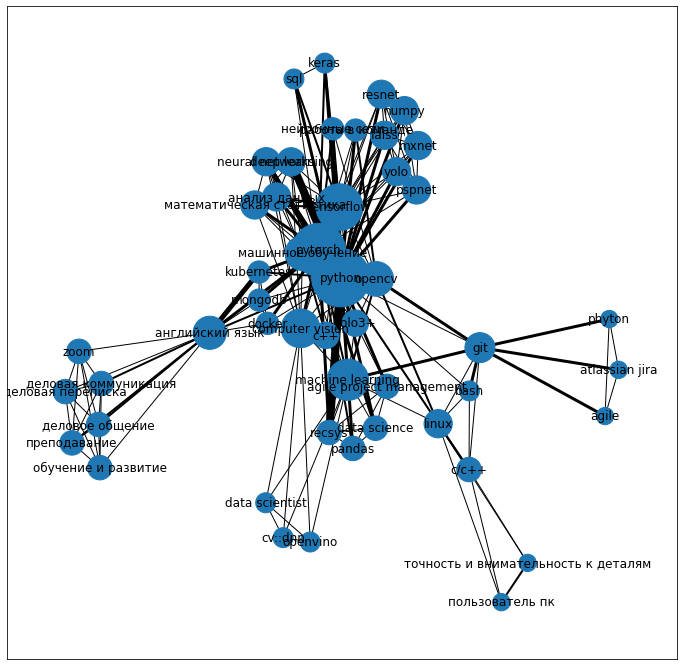

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

"""
#Raw scraped tags look like this:

Python SQL
Python PostgreSQL MongoDB C/C++
Python PostgreSQL C/C++
Python SQL Linux Git Bash
Python PostgreSQL Bash Django Git
Python SQL PostgreSQL MongoDB
Python MongoDB

# After preprocessing tags look like this:
weighted_pairs = [("python", "SQL", 2),
                  ("python", "PostgreSQL", 4),
                  ("python", "python", 4),
                  ("python", "MongoDB", 3),
                  ("python", "C/C++", 2),
                  ("python", "Linux", 4),
                  ("python", "Git", 2),
                  ("python", "Bash", 2),
                  ("python", "Django", 1),
                  ("PostgreSQL", "MongoDB", 2),
                  ("PostgreSQL", "C/C++", 2),
                  ("PostgreSQL", "Bash", 1),
                  ("PostgreSQL", "Django", 1),
                  ("PostgreSQL", "Git", 1),
                  ("PostgreSQL", "SQL", 1),
                  ("MongoDB", "C/C++", 1),
                  ("MongoDB", "SQL", 1),
                  ("MongoDB", "C/C++", 1),
                  ("SQL", "Linux", 1),
                  ("SQL", "Git", 1),
                  ("SQL", "Bash", 1),
                  ("Git", "Linux", 1),
                  ("Git", "Bash", 1),
                  ("Git", "Django", 1),
                  ("Django", "Bash", 1),
                  ("Git", "Bash", 1),
                  ("Git", "Linux", 1),
                 ]
"""

weighted_pairs = [(k[0], k[1], v) for k, v in links.items()]
#print(weighted_pairs)

G = nx.Graph()
G.add_weighted_edges_from(weighted_pairs)
pos = nx.spring_layout(G)

print(list(G.nodes()))

all_words = [w for e in weighted_pairs for w in e[:2]]
sizes = [(all_words.count(i))*50 for i in list(G.nodes())]
weights = [e[2] for e in weighted_pairs]

print([all_words.count(i) for i in list(G.nodes())])


plt.figure(3,figsize=(12,12))
nx.draw_networkx_nodes(G, pos, node_size=sizes)#, node_color='#A0CBE2', node_cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, width=weights)#, node_color='#A0CBE2', edge_cmap=plt.cm.Blues)
nx.draw_networkx_labels(G, pos)
plt.show()